In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from pathlib import Path

In [4]:
import yaml

In [5]:
import pandas as pd

In [33]:
from tqdm.notebook import tqdm

In [67]:
from sklearn import preprocessing

In [6]:
data_config_path = Path('/home/fusionresearch/AliThesis/lidar-bonnetal/train/tasks/semantic/config/labels/semantic-kitti.yaml')

In [18]:
labels_config = yaml.safe_load(open(data_config_path, 'r'))["labels"]

In [7]:
dataset_root_dir = Path('/home/fusionresearch/SemanticKitti/dataset/sequences/')

In [8]:
sequences = [i.name for i in sorted(dataset_root_dir.glob("*")) if i.is_dir()]

In [9]:
sequences

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21']

In [13]:
def get_label_data(label_file_path):
    label_data = np.fromfile(str(label_file_path), dtype=np.int32)
    label_data = label_data.reshape((-1))
    sem_label = label_data & 0xFFFF  
    return sem_label

In [14]:
sequences_results = {}

In [35]:
for seq in sequences:
    seq_result = {}
    seq_labels_path = dataset_root_dir / seq / "labels"
    seq_labels_files = [i.name for i in sorted(seq_labels_path.glob("*.label"))]
    
    for label_file in tqdm(seq_labels_files, f"getting data for seq {seq}"):
        label_file_path =  dataset_root_dir / seq / "labels" / label_file
        label_data = get_label_data(label_file_path)
        classes_in_file, occurences = np.unique(label_data, return_counts=True)
        classes_numbers = list(zip(classes_in_file, occurences))
        for c, o in classes_numbers:
            class_name = labels_config[c]
            if c in seq_result:
                seq_result[class_name] += o
            else:
                seq_result[class_name] = o
        
    print(seq_result)    
    sequences_results[seq] = seq_result


{'unlabeled': 1460, 'outlier': 34, 'car': 20033, 'road': 31102, 'parking': 9037, 'sidewalk': 14571, 'building': 29704, 'fence': 4, 'other-structure': 21, 'lane-marking': 68, 'vegetation': 9984, 'trunk': 968, 'terrain': 155, 'pole': 721, 'traffic-sign': 393, 'other-object': 2070, 'moving-motorcyclist': 1, 'moving-person': 2, 'other-vehicle': 32, 'motorcyclist': 1, 'moving-car': 1, 'moving-bicyclist': 265, 'bicycle': 214, 'other-ground': 19, 'motorcycle': 45, 'person': 2, 'bicyclist': 1, 'truck': 20, 'moving-bus': 3, 'moving-other-vehicle': 1}



{'unlabeled': 6666, 'outlier': 4, 'road': 35677, 'fence': 16056, 'vegetation': 44635, 'terrain': 7637, 'pole': 229, 'traffic-sign': 193, 'moving-car': 426, 'other-structure': 1, 'other-ground': 7, 'other-object': 1, 'moving-motorcyclist': 17, 'trunk': 5, 'building': 23, 'sidewalk': 1, 'moving-other-vehicle': 1606}



{'unlabeled': 1166, 'outlier': 18, 'road': 19107, 'sidewalk': 20862, 'fence': 37829, 'other-structure': 1, 'vegetation': 8646, 'trunk': 23, 'terrain': 19, 'pole': 477, 'traffic-sign': 31, 'other-object': 175, 'moving-car': 2, 'other-ground': 2, 'car': 2185, 'building': 35812, 'parking': 6, 'person': 1, 'other-vehicle': 2, 'motorcycle': 2, 'bicycle': 1, 'moving-person': 2, 'moving-motorcyclist': 19, 'moving-bicyclist': 1, 'lane-marking': 1, 'motorcyclist': 1}



{'unlabeled': 3777, 'outlier': 4, 'car': 216, 'road': 52025, 'parking': 1, 'sidewalk': 9130, 'building': 1, 'fence': 5860, 'vegetation': 47195, 'trunk': 759, 'terrain': 1462, 'pole': 385, 'other-object': 2232, 'moving-person': 13, 'traffic-sign': 240, 'moving-car': 1, 'other-structure': 1, 'other-vehicle': 10, 'bicycle': 1, 'truck': 20, 'other-ground': 1}



{'unlabeled': 3262, 'outlier': 3, 'car': 42, 'bus': 44, 'person': 2, 'road': 40165, 'parking': 1, 'sidewalk': 6155, 'other-ground': 4, 'building': 76, 'fence': 4240, 'vegetation': 42345, 'trunk': 1080, 'terrain': 19374, 'pole': 550, 'traffic-sign': 152, 'other-object': 1224, 'moving-car': 4008, 'moving-person': 6}



{'unlabeled': 1418, 'outlier': 1, 'car': 6860, 'truck': 35, 'other-vehicle': 1, 'road': 20205, 'parking': 5490, 'sidewalk': 25957, 'other-ground': 1, 'building': 20657, 'fence': 6561, 'other-structure': 1, 'vegetation': 28324, 'trunk': 363, 'terrain': 2128, 'pole': 629, 'traffic-sign': 429, 'other-object': 2443, 'moving-person': 2, 'moving-car': 1, 'bicycle': 24, 'motorcycle': 1, 'lane-marking': 2, 'person': 1, 'moving-bicyclist': 4, 'moving-bus': 1}



{'unlabeled': 3216, 'outlier': 1, 'car': 1432, 'bicycle': 1, 'motorcycle': 5, 'truck': 57, 'other-vehicle': 12, 'road': 61935, 'parking': 3, 'sidewalk': 4492, 'building': 16002, 'fence': 6320, 'vegetation': 6395, 'trunk': 343, 'terrain': 11426, 'pole': 458, 'traffic-sign': 681, 'other-object': 5719, 'moving-car': 1050, 'person': 1, 'other-ground': 2657, 'other-structure': 26, 'moving-bicyclist': 27, 'moving-truck': 1, 'moving-person': 8}



{'unlabeled': 1332, 'outlier': 2, 'car': 6777, 'bicycle': 4, 'truck': 3342, 'person': 1023, 'road': 30550, 'sidewalk': 14696, 'building': 18683, 'fence': 4210, 'other-structure': 7986, 'vegetation': 16042, 'trunk': 66, 'terrain': 442, 'pole': 1066, 'traffic-sign': 132, 'other-object': 1961, 'moving-person': 91, 'moving-car': 7581, 'motorcycle': 1, 'other-vehicle': 3, 'moving-bicyclist': 2, 'parking': 1, 'moving-truck': 110}



{'unlabeled': 4077, 'outlier': 8, 'car': 8629, 'bicycle': 142, 'person': 13, 'road': 29468, 'parking': 28024, 'sidewalk': 13479, 'building': 16053, 'fence': 548, 'other-structure': 3, 'vegetation': 8114, 'trunk': 521, 'terrain': 7728, 'pole': 526, 'traffic-sign': 255, 'other-object': 4149, 'moving-car': 76, 'moving-person': 434, 'other-ground': 1, 'moving-bicyclist': 4, 'other-vehicle': 60, 'motorcycle': 31, 'lane-marking': 1, 'bicyclist': 2, 'motorcyclist': 18, 'moving-other-vehicle': 18, 'truck': 84}



{'unlabeled': 2502, 'outlier': 20, 'car': 683, 'other-vehicle': 2028, 'road': 48205, 'parking': 89, 'sidewalk': 6948, 'other-ground': 20, 'building': 3929, 'fence': 1477, 'vegetation': 46718, 'trunk': 496, 'terrain': 12544, 'pole': 331, 'traffic-sign': 140, 'other-object': 196, 'moving-person': 4, 'truck': 15, 'moving-car': 1, 'motorcycle': 5, 'person': 3, 'bicycle': 19, 'other-structure': 1}



{'unlabeled': 433, 'outlier': 62, 'road': 24082, 'sidewalk': 21984, 'fence': 21979, 'vegetation': 39758, 'trunk': 162, 'terrain': 119, 'pole': 105, 'traffic-sign': 2, 'moving-car': 50, 'other-ground': 8, 'other-structure': 791, 'building': 12790, 'other-object': 1779, 'motorcycle': 11, 'other-vehicle': 128, 'car': 1699, 'bicycle': 9, 'person': 15, 'parking': 3, 'moving-person': 80, 'moving-truck': 1939}



{}



{}



{}



{}



{}



{}



{}



{}



{}



{}



{}


In [112]:
statistics_dataframe = pd.DataFrame(sequences_results)

In [113]:
statistics_dataframe = statistics_dataframe.fillna(0)

In [114]:
statistics_dataframe

,00,01,02,03,04,05,06,07,08,09,...,12,13,14,15,16,17,18,19,20,21
unlabeled,1460.0,6666.0,1166.0,3777.0,3262.0,1418.0,3216.0,1332.0,4077.0,2502.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
outlier,34.0,4.0,18.0,4.0,3.0,1.0,1.0,2.0,8.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
car,20033.0,0.0,2185.0,216.0,42.0,6860.0,1432.0,6777.0,8629.0,683.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
road,31102.0,35677.0,19107.0,52025.0,40165.0,20205.0,61935.0,30550.0,29468.0,48205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parking,9037.0,0.0,6.0,1.0,1.0,5490.0,3.0,1.0,28024.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sidewalk,14571.0,1.0,20862.0,9130.0,6155.0,25957.0,4492.0,14696.0,13479.0,6948.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
building,29704.0,23.0,35812.0,1.0,76.0,20657.0,16002.0,18683.0,16053.0,3929.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fence,4.0,16056.0,37829.0,5860.0,4240.0,6561.0,6320.0,4210.0,548.0,1477.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
other-structure,21.0,1.0,1.0,1.0,0.0,1.0,26.0,7986.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lane-marking,68.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
statistics_dataframe = statistics_dataframe.drop(statistics_dataframe.columns[-11:],axis=1)



In [116]:
statistics_dataframe

,00,01,02,03,04,05,06,07,08,09,10
unlabeled,1460.0,6666.0,1166.0,3777.0,3262.0,1418.0,3216.0,1332.0,4077.0,2502.0,433.0
outlier,34.0,4.0,18.0,4.0,3.0,1.0,1.0,2.0,8.0,20.0,62.0
car,20033.0,0.0,2185.0,216.0,42.0,6860.0,1432.0,6777.0,8629.0,683.0,1699.0
road,31102.0,35677.0,19107.0,52025.0,40165.0,20205.0,61935.0,30550.0,29468.0,48205.0,24082.0
parking,9037.0,0.0,6.0,1.0,1.0,5490.0,3.0,1.0,28024.0,89.0,3.0
sidewalk,14571.0,1.0,20862.0,9130.0,6155.0,25957.0,4492.0,14696.0,13479.0,6948.0,21984.0
building,29704.0,23.0,35812.0,1.0,76.0,20657.0,16002.0,18683.0,16053.0,3929.0,12790.0
fence,4.0,16056.0,37829.0,5860.0,4240.0,6561.0,6320.0,4210.0,548.0,1477.0,21979.0
other-structure,21.0,1.0,1.0,1.0,0.0,1.0,26.0,7986.0,3.0,1.0,791.0
lane-marking,68.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


In [117]:
def normlize_col(col):
    x = col.values.astype('float').reshape(1, -1)
    print(x)
    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.Normalizer(norm='l1')

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x).reshape(-1)
    print(x_scaled)
    return x_scaled

In [118]:
# statistics_dataframe.to_csv("dataset_stats.csv")

In [119]:
statistics_dataframe

,00,01,02,03,04,05,06,07,08,09,10
unlabeled,1460.0,6666.0,1166.0,3777.0,3262.0,1418.0,3216.0,1332.0,4077.0,2502.0,433.0
outlier,34.0,4.0,18.0,4.0,3.0,1.0,1.0,2.0,8.0,20.0,62.0
car,20033.0,0.0,2185.0,216.0,42.0,6860.0,1432.0,6777.0,8629.0,683.0,1699.0
road,31102.0,35677.0,19107.0,52025.0,40165.0,20205.0,61935.0,30550.0,29468.0,48205.0,24082.0
parking,9037.0,0.0,6.0,1.0,1.0,5490.0,3.0,1.0,28024.0,89.0,3.0
sidewalk,14571.0,1.0,20862.0,9130.0,6155.0,25957.0,4492.0,14696.0,13479.0,6948.0,21984.0
building,29704.0,23.0,35812.0,1.0,76.0,20657.0,16002.0,18683.0,16053.0,3929.0,12790.0
fence,4.0,16056.0,37829.0,5860.0,4240.0,6561.0,6320.0,4210.0,548.0,1477.0,21979.0
other-structure,21.0,1.0,1.0,1.0,0.0,1.0,26.0,7986.0,3.0,1.0,791.0
lane-marking,68.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


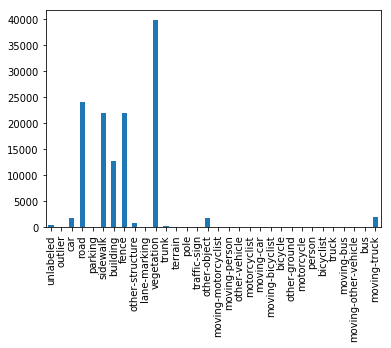

In [120]:
statistics_dataframe["10"].plot.bar()

In [121]:
statistics_dataframe_scaled = statistics_dataframe.apply(normlize_col, axis=0)

[[1.4600e+03 3.4000e+01 2.0033e+04 3.1102e+04 9.0370e+03 1.4571e+04
  2.9704e+04 4.0000e+00 2.1000e+01 6.8000e+01 9.9840e+03 9.6800e+02
  1.5500e+02 7.2100e+02 3.9300e+02 2.0700e+03 1.0000e+00 2.0000e+00
  3.2000e+01 1.0000e+00 1.0000e+00 2.6500e+02 2.1400e+02 1.9000e+01
  4.5000e+01 2.0000e+00 1.0000e+00 2.0000e+01 3.0000e+00 1.0000e+00
  0.0000e+00 0.0000e+00]]
[1.20729005e-02 2.81149737e-04 1.65655079e-01 2.57185857e-01
 7.47279463e-02 1.20489201e-01 2.45625641e-01 3.30764397e-05
 1.73651308e-04 5.62299474e-04 8.25587934e-02 8.00449840e-03
 1.28171204e-03 5.96202825e-03 3.24976020e-03 1.71170575e-02
 8.26910991e-06 1.65382198e-05 2.64611517e-04 8.26910991e-06
 8.26910991e-06 2.19131413e-03 1.76958952e-03 1.57113088e-04
 3.72109946e-04 1.65382198e-05 8.26910991e-06 1.65382198e-04
 2.48073297e-05 8.26910991e-06 0.00000000e+00 0.00000000e+00]
[[1.4600e+03 3.4000e+01 2.0033e+04 3.1102e+04 9.0370e+03 1.4571e+04
  2.9704e+04 4.0000e+00 2.1000e+01 6.8000e+01 9.9840e+03 9.6800e+02
  1.5500e

In [122]:
statistics_dataframe_scaled

,00,01,02,03,04,05,06,07,08,09,10
unlabeled,0.012073,0.058895,0.009225,0.030624,0.026578,0.011667,0.026303,0.011473,0.033291,0.019798,0.003383
outlier,0.000281,0.000035,0.000142,0.000032,0.000024,0.000008,0.000008,0.000017,0.000065,0.000158,0.000484
car,0.165655,0.000000,0.017288,0.001751,0.000342,0.056443,0.011712,0.058371,0.070460,0.005405,0.013275
road,0.257186,0.315212,0.151174,0.421822,0.327255,0.166243,0.506551,0.263128,0.240622,0.381447,0.188158
parking,0.074728,0.000000,0.000047,0.000008,0.000008,0.045171,0.000025,0.000009,0.228831,0.000704,0.000023
sidewalk,0.120489,0.000009,0.165059,0.074027,0.050150,0.213569,0.036739,0.126577,0.110063,0.054980,0.171766
building,0.245626,0.000203,0.283343,0.000008,0.000619,0.169962,0.130876,0.160917,0.131081,0.031090,0.099931
fence,0.000033,0.141858,0.299301,0.047513,0.034547,0.053983,0.051690,0.036261,0.004475,0.011688,0.171727
other-structure,0.000174,0.000009,0.000008,0.000008,0.000000,0.000008,0.000213,0.068784,0.000024,0.000008,0.006180
lane-marking,0.000562,0.000000,0.000008,0.000000,0.000000,0.000016,0.000000,0.000000,0.000008,0.000000,0.000000


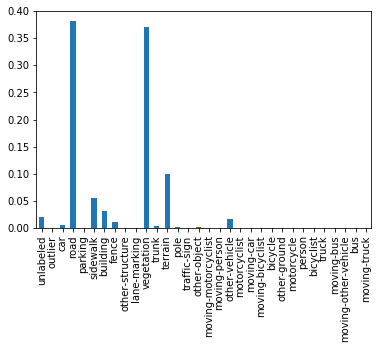

In [123]:
statistics_dataframe_scaled["09"].plot.bar()

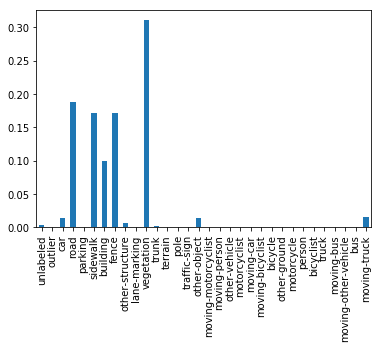

In [124]:
statistics_dataframe_scaled["10"].plot.bar()